In [1]:
#importing packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, LabelEncoder
warnings.filterwarnings("ignore")

2022-11-05 19:55:48.829652: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 19:55:48.944671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nahom_habtemichael/project/ad_optimisation/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-05 19:55:48.944690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 19:55:48.977322: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for pl

In [2]:
clean_cta = pd.read_csv('../clean_data/clean_cta.csv')
clean_eng = pd.read_csv('../clean_data/clean_engagement.csv')
clean_logo = pd.read_csv('../clean_data/clean_logo.csv')
clean_text = pd.read_csv('../clean_data/extracted_features.csv')
perf_data = pd.read_csv('../data/performance_data.csv')



In [3]:
clean_cta.isnull().sum()

Assets                0
top_left_X            0
top_left_Y            0
bottom_right_X        0
top_right_Y           0
height                0
width                 0
total_image_height    0
total_image_width     0
dtype: int64

In [4]:
clean_eng.isnull().sum()

Assets                0
top_left_X            0
top_left_Y            0
bottom_right_X        0
top_right_Y           0
height                0
width                 0
total_image_height    0
total_image_width     0
dtype: int64

In [5]:
clean_logo.isnull().sum()

Assets                0
top_left_X            0
top_left_Y            0
bottom_right_X        0
top_right_Y           0
height                0
width                 0
total_image_height    0
total_image_width     0
dtype: int64

In [6]:
clean_text.isnull().sum()

Game_Id            0
Full_Text          0
Txt_char_lenght    0
Txt_Word_length    0
dtype: int64

In [7]:
perf_data.isnull().sum()

game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64

In [8]:
clean_text.rename(columns={'Game_Id':'Assets'},inplace=True)
perf_data.rename(columns={'game_id':'Assets'},inplace=True)

In [9]:
perf_data.drop('preview_link',axis=1,inplace=True)

In [10]:
perf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Assets  905 non-null    object 
 1   ER      905 non-null    float64
 2   CTR     905 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.3+ KB


In [11]:
merged_df = pd.merge(pd.merge(pd.merge(clean_cta,clean_eng,on='Assets'),clean_logo,on='Assets'),clean_text,on='Assets')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [13]:
merged_df2 = pd.merge(merged_df,perf_data,on='Assets')

In [14]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [15]:
target = merged_df2.pop('ER')

In [16]:
# type(target)
merged_df2.drop('CTR',axis=1,inplace=True)

In [17]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [18]:
df = merged_df2.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [20]:
df.dtypes

Assets                   object
top_left_X_x            float64
top_left_Y_x            float64
bottom_right_X_x        float64
top_right_Y_x           float64
height_x                float64
width_x                 float64
total_image_height_x    float64
total_image_width_x     float64
top_left_X_y            float64
top_left_Y_y            float64
bottom_right_X_y        float64
top_right_Y_y           float64
height_y                float64
width_y                 float64
total_image_height_y    float64
total_image_width_y     float64
top_left_X              float64
top_left_Y              float64
bottom_right_X          float64
top_right_Y             float64
height                  float64
width                   float64
total_image_height      float64
total_image_width       float64
Full_Text                object
Txt_char_lenght           int64
Txt_Word_length           int64
dtype: object

In [21]:
df.drop(['Full_Text','Assets'],axis=1,inplace=True)

In [22]:
df.dtypes

top_left_X_x            float64
top_left_Y_x            float64
bottom_right_X_x        float64
top_right_Y_x           float64
height_x                float64
width_x                 float64
total_image_height_x    float64
total_image_width_x     float64
top_left_X_y            float64
top_left_Y_y            float64
bottom_right_X_y        float64
top_right_Y_y           float64
height_y                float64
width_y                 float64
total_image_height_y    float64
total_image_width_y     float64
top_left_X              float64
top_left_Y              float64
bottom_right_X          float64
top_right_Y             float64
height                  float64
width                   float64
total_image_height      float64
total_image_width       float64
Txt_char_lenght           int64
Txt_Word_length           int64
dtype: object

In [23]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = target  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [24]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

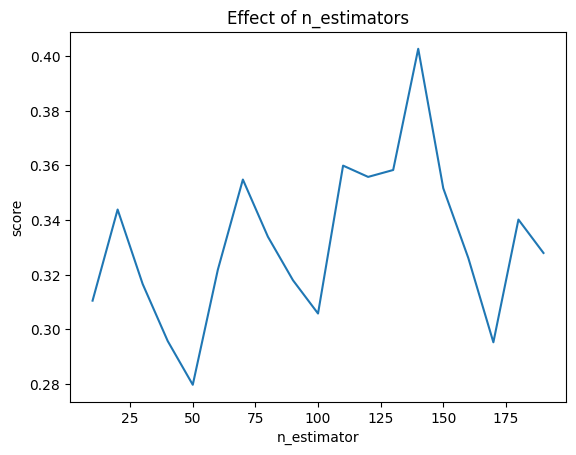

In [26]:
# Try different numbers of n_estimators 
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [27]:
scores

[0.31050940421738715,
 0.3438451534440541,
 0.3165902374447471,
 0.295732403477839,
 0.2797357213232806,
 0.3217969978019749,
 0.3548128336394665,
 0.3338856946324268,
 0.31797332660815425,
 0.3057983888532272,
 0.35990870860860613,
 0.35578124470470973,
 0.35830609660333956,
 0.40264936878552104,
 0.3516197873408332,
 0.3260857351117088,
 0.29527900320503986,
 0.34017294409723753,
 0.3279536030231537]